# rigider方法是对于一个空间场计算其最优刚体变换参数

In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import rigider
import meteva.base as meb

## 刚体变换

<font face="黑体" color=Blue size=3>**rigider(grd_fo, grd_ob, init=None, func_type="regular", translate=True, rotate=False,
            interp="bicubic", stages=True, verbose=False)**</font>   
  
|参数|说明|    
|:--|:--|  
|**<font face="黑体" color=Blue size=5>grd_fo</font>**| 二维矩阵形式的网格预报场 |  
|**<font face="黑体" color=Blue size=5>grd_ob</font>**| 二维矩阵形式的网格观测场 | 
|**init**| 优化函数的初始值，包含三个元素的一维数组，，其中的第一第二个元素代表质心的位移，第三个元素代表旋转的角度 | 
|**func_type**| 刚体变换模式，可选值为"regular", "fast"，regular代表使用优化函数迭代求值，fast直接计算质心位移和旋转角度 | 
|**translate**| 布尔值，代表是否平移 |       
|**rotate**| 布尔值，代表是否旋转 |  
|**interp**| 插值方式，可选为round”， “bilinear”, “bicubic”, 分别代表最邻近插值,双线性插值,双三次插值 |  
|**stages**| 布尔值，代表计算最优刚体变换时，是否在旋转前优先进行平移 |  
|**verbose**| 布尔值，是否打印日志 |  
**调用示例**

### 调用参数处理

In [2]:
x = np.zeros((20, 40))
y = np.zeros((20, 40))
x[11:18, 1:3] = 1
y[12:19, 4:6] = 1

### 参数示例

In [3]:
x

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

<font face="黑体" color=green size=4>**返回结果内容说明**</font>  
结果中grd_fo, grd_ob, interp, func_type,init是从参数中继承下来.
  
|一级关键词|说明|备注|
|:---|:--:|:---|
|**<font face="黑体" color=green size=3>translation_only</font>**| 旋转前的平移优化结果 | 仅func_type = “regular” 且stage = true 且 translate = true 时存在|
|**<font face="黑体" color=green size=3>rotate</font>**| 平移+旋转优化结果 | 仅func_type = “regular” 且stage = true 且 rotate = true 时存在|
|**<font face="黑体" color=green size=3>optim_object</font>**| 平移+旋转优化结果 | 仅func_type = “regular” 且stage = false 时存在|
|**<font face="黑体" color=green size=3>value</font>**| 优化后的loss function | 仅func_type = “regular” 且stage = true 时存在|
|**<font face="黑体" color=green size=3>par</font>**| 最优刚体变换参数 | 字典，视输入输入情况包含"x", "y", "theta" |
|**<font face="黑体" color=green size=3>p1</font>**| p0变换后的坐标 | 二维数组 |
|**<font face="黑体" color=green size=3>grd_fo_transformed</font>**| 变换后的预报场 | 二维数组 |

In [4]:
tmp = rigider.rigider(grd_fo=x, grd_ob=y)

### 部分结果图示

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


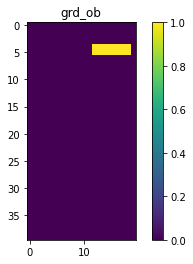

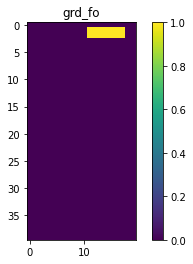

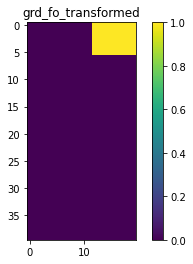

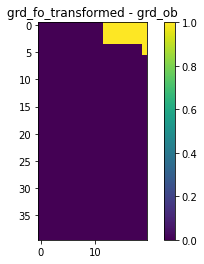

In [5]:
plt.imshow(tmp['grd_ob'].transpose())
plt.colorbar()
plt.title("grd_ob")
plt.show()
plt.imshow(tmp['grd_fo'].transpose())
plt.colorbar()
plt.title("grd_fo")
plt.show()
plt.imshow(tmp['grd_fo_transformed'].transpose())
plt.colorbar()
plt.title("grd_fo_transformed")
plt.show()
plt.imshow(tmp['grd_fo_transformed'].transpose() - tmp['grd_ob'].transpose())
plt.colorbar()
plt.title("grd_fo_transformed - grd_ob")
plt.show()


In [6]:
file_name_ob = r'./data/ob/20070111.000.nc'
file_name_fo = r'./data/fo/20070108.003.nc'
grd_ob = meb.read_griddata_from_nc(file_name_ob)
grd_fo = meb.read_griddata_from_nc(file_name_fo)

In [7]:
tmp = rigider.rigider(grd_fo=grd_fo[0][0][0][0], grd_ob=grd_ob[0][0][0][0])

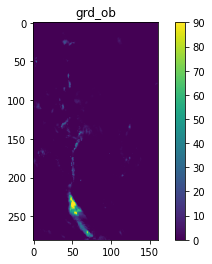

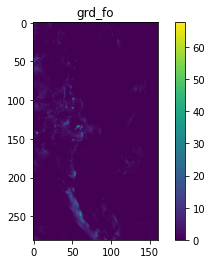

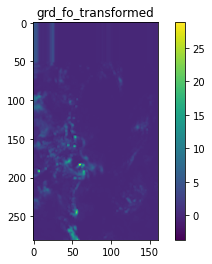

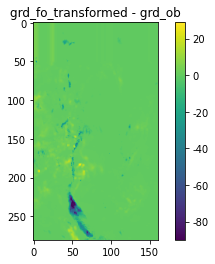

In [8]:
plt.imshow(tmp['grd_ob'].transpose())
plt.colorbar()
plt.title("grd_ob")
plt.show()
plt.imshow(tmp['grd_fo'].transpose())
plt.colorbar()
plt.title("grd_fo")
plt.show()
plt.imshow(tmp['grd_fo_transformed'].transpose())
plt.colorbar()
plt.title("grd_fo_transformed")
plt.show()
plt.imshow(tmp['grd_fo_transformed'].transpose() - tmp['grd_ob'].transpose())
plt.colorbar()
plt.title("grd_fo_transformed - grd_ob")
plt.show()
